In [1]:
%run model-run-function-definitions.ipynb

## RLS

In [43]:
TEMP_VAR = "rls"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [44]:
lw_year_month_xr = get_year_and_months_xr(con_year_xr_map, con_year_xr_map)
lw_month_xr = lw_year_month_xr.mean(dim='year')
lw_jja = lw_month_xr.sel(month=slice(0,3)).mean(dim='month')
lw_son = lw_month_xr.sel(month=slice(3,6)).mean(dim='month')
lw_djf = lw_month_xr.sel(month=slice(6,9)).mean(dim='month')
lw_mam = lw_month_xr.sel(month=slice(9,12)).mean(dim='month')
lw_seas = xr.concat((lw_jja, lw_son, lw_djf, lw_mam), dim='time')

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking coords of 2006 - has 'longtitude'
Checking coords of 2007 - has 'longtitude'
Checking coords of 2008 - has 'longtitude'
Checking coords of 2009 - has 'longtitude'
Checking coords of 2010 - has 'longtitude'
Checking coords of 2011 - has 'longtitude'
Checking coords of 2012 - has 'longtitude'
Checking co

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


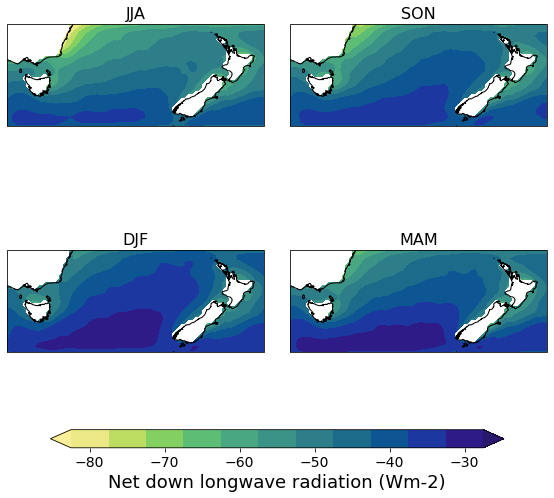

In [49]:
def multiple_plots():
    nrow = 2
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(20,12), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data1 = lw_seas.where((mask==0).mean(dim='time'))
    
    season_labels = ['JJA', 'SON', 'DJF', 'MAM']
    
    data_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data1[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-82.5, -25, 5),
                add_colorbar=False,
                cmap=cmocean.cm.haline_r,
                extend='both'
           ) 
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([142, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(season_labels[data_idx], fontsize=16)
            
            data_idx += 1        
    
    #fig.tight_layout()
    plt.subplots_adjust(left=0.125,
                    bottom=0.3, 
                    right=0.5, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.15)
    
    cb = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-80,-20,10),
                      fraction=0.035,aspect=25, extend='both') #,format='%.2f')
    cb.set_label(label='Net down longwave radiation (Wm-2)', size=18, weight='normal')
    cb.ax.tick_params(labelsize=14)
 
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/lw_seas_ocean.png')   

multiple_plots()

In [3]:
# Untested v

lw_year_phases_xr = get_year_2phases_xr(alt_year_xr_map, diff_year_xr_map)

lw_sig_da = get_sig_da(lw_year_phases_xr)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


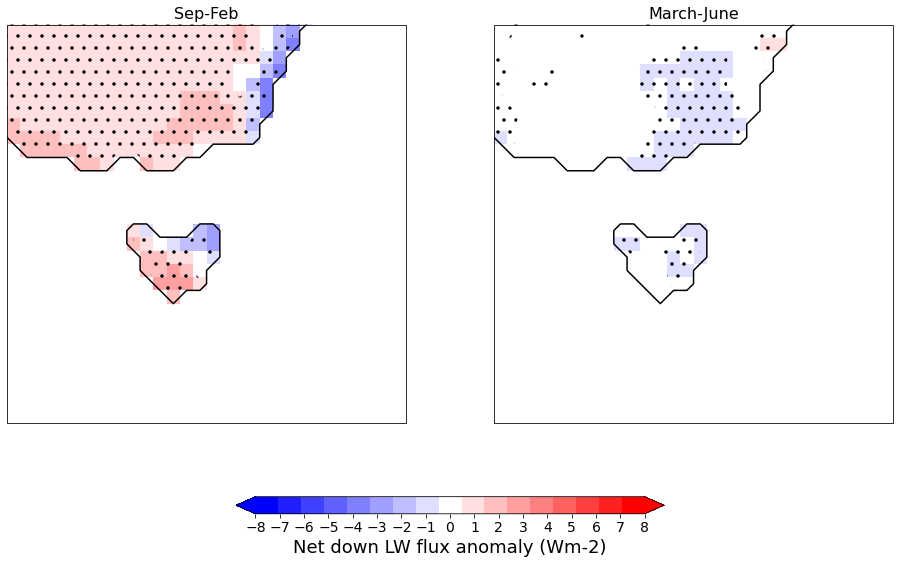

In [4]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = lw_year_phases_xr.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 17),
            vmin=-8, vmax=8,
            add_colorbar=False,
            extend = 'both'
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = lw_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([140, 155, -48, -33],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-8, 9, 1),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Net down LW flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/new_diff_lw_phases_aus.png')
    #0.035

multiple_plots()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


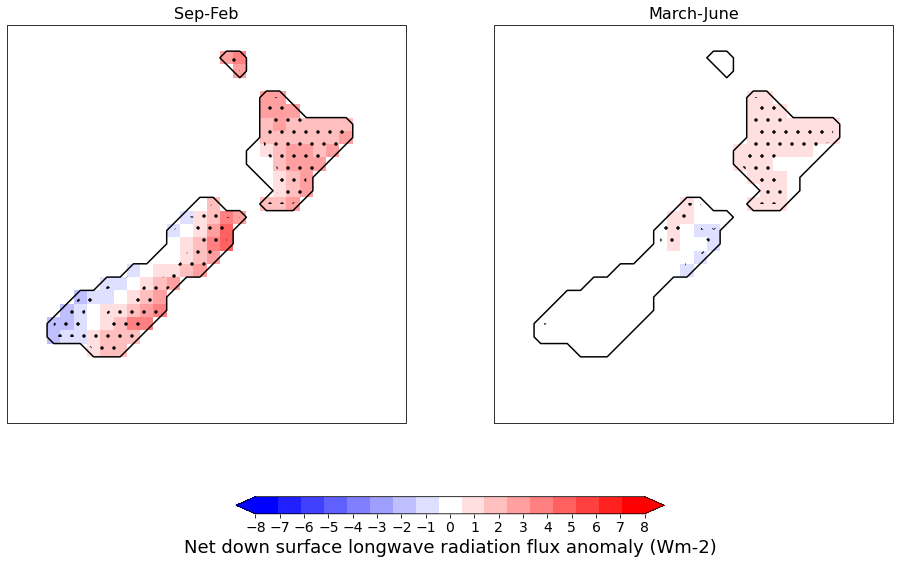

In [7]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = lw_year_phases_xr.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 17),
            vmin=-8, vmax=8,
            add_colorbar=False, 
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = lw_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([165, 180, -49, -34],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-8, 9, 1),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Net down surface longwave radiation flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/new_diff_lw_phases_nz.png')
    #0.035

multiple_plots()

## Surface air temperature

In [2]:
TEMP_VAR = "ts_0"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

In [3]:
con_phases_xr = get_year_2phases_xr(con_year_xr_map, con_year_xr_map, phase_dim='time')

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [16]:
test = con_year_xr_map[2004]
test_shift = test.shift(longitude=1)
test_shift

<xarray.DataArray 'ts_0' (time: 395, latitude: 50, longitude: 110)>
dask.array<rechunk-merge, shape=(395, 50, 110), dtype=float32, chunksize=(31, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2004-06-01T12:00:00 ... 2005-06-30T12:00:00
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0

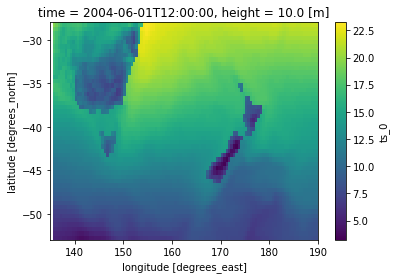

In [18]:
test_shift.isel(time=0).plot()

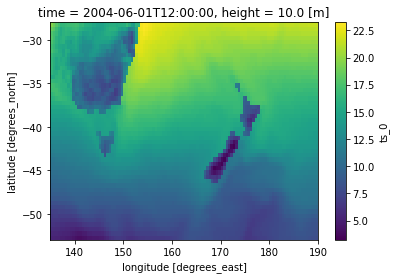

In [19]:
test.isel(time=0).plot()

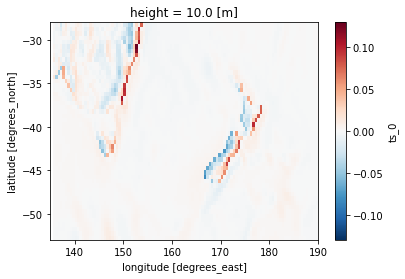

In [24]:
((test - test_shift)/50).mean(dim='time').plot()

In [4]:
# Untested v

#year_phases_xr = get_year_phases_xr(alt_year_xr_map, diff_year_xr_map)

year_phases_xr = get_year_2phases_xr(alt_year_xr_map, diff_year_xr_map)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [5]:
sig_da = get_sig_da(year_phases_xr)

In [8]:
# ensembles that show positive warming

pos1 = year_phases_xr.isel(phase=0).where(year_phases_xr.isel(phase=0)>0.05)
pos1

<xarray.DataArray 'ts_0' (time: 36, latitude: 50, longitude: 110)>
dask.array<where, shape=(36, 50, 110), dtype=float32, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Dimensions without coordinates: time

In [9]:
count1 = pos1.count(dim='time')
count1

<xarray.DataArray 'ts_0' (latitude: 50, longitude: 110)>
dask.array<sum-aggregate, shape=(50, 110), dtype=int64, chunksize=(50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0

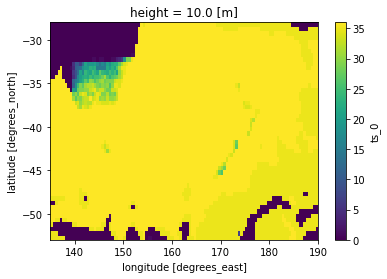

In [10]:
count1.plot()

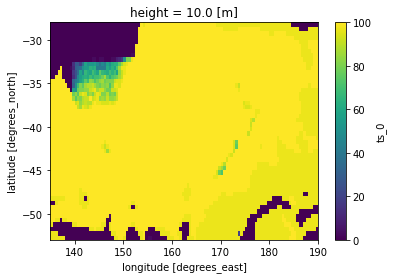

In [11]:
# representing as a proportion of all ensembles 

((count1/36)*100).plot()

In [12]:
(((year_phases_xr.where(year_phases_xr>0.05).count(dim='time'))/36)*100).where(mask).mean(dim='time')

<xarray.DataArray 'ts_0' (phase: 2, latitude: 50, longitude: 110)>
dask.array<mean_agg-aggregate, shape=(2, 50, 110), dtype=float64, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude                (longitude) float32 135.2 135.8 ... 189.2 189.8
  * latitude                 (latitude) float32 -52.75 -52.25 ... -28.75 -28.25
    height                   float64 10.0
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
Dimensions without coordinates: phase

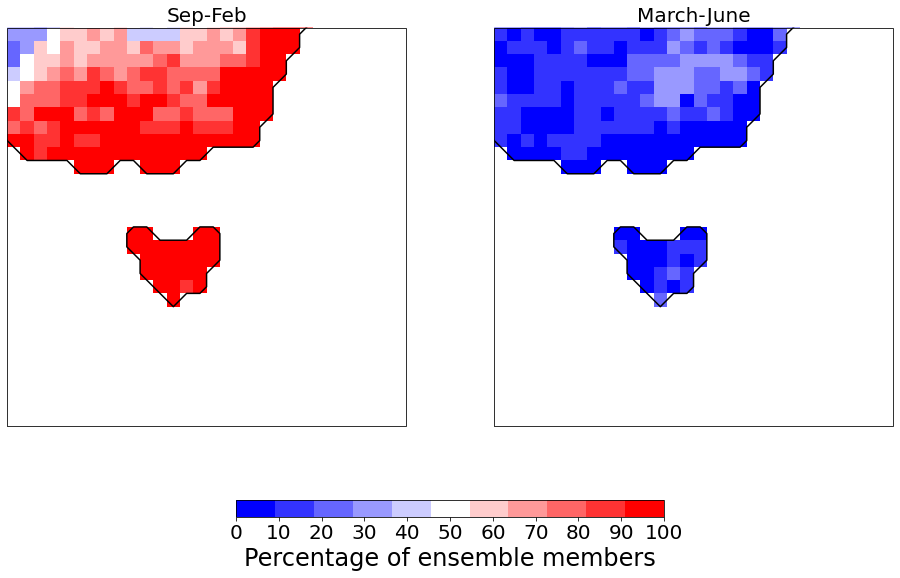

In [6]:
## likelihood of warming plots

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = (((year_phases_xr.where(year_phases_xr>0.05).count(dim='time'))/36)*100).where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 11),
            vmin=0, vmax=100,
            add_colorbar=False, 
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')

        ax[col].set_extent([140, 155, -48, -33],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=20)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(0, 110, 10),
                        fraction=0.035,aspect=25)
    cbar.set_label("Percentage of ensemble members", fontsize=24)  
    cbar.ax.tick_params(labelsize=20)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/warming_aus_2p.png')
    #0.035

multiple_plots()

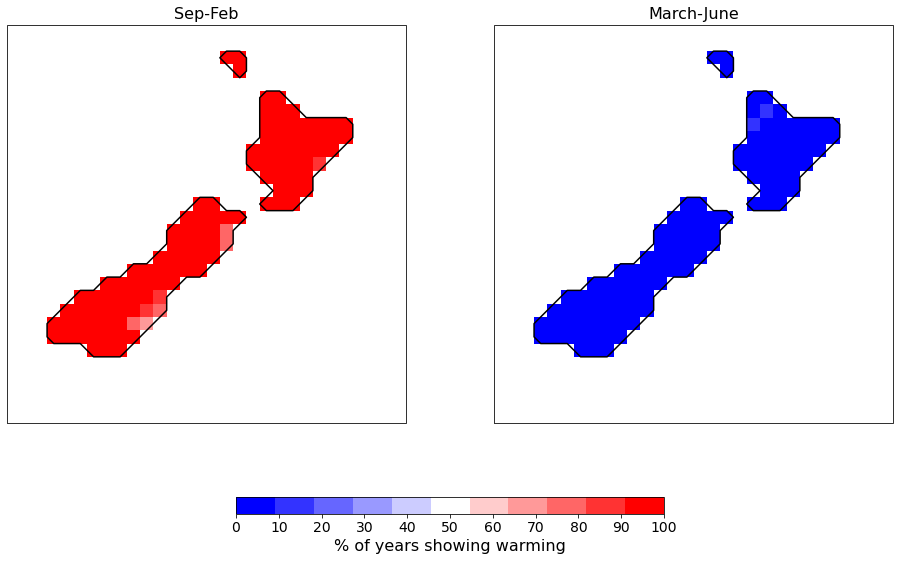

In [14]:
## likelihood of warming plots

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = (((year_phases_xr.where(year_phases_xr>0.05).count(dim='time'))/36)*100).where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 11),
            vmin=0, vmax=100,
            add_colorbar=False, 
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')

        ax[col].set_extent([165, 180, -49, -34],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(0, 110, 10),
                        fraction=0.035,aspect=25)
    cbar.set_label("% of years showing warming", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/warming_nz_2.png')
    #0.035

multiple_plots()

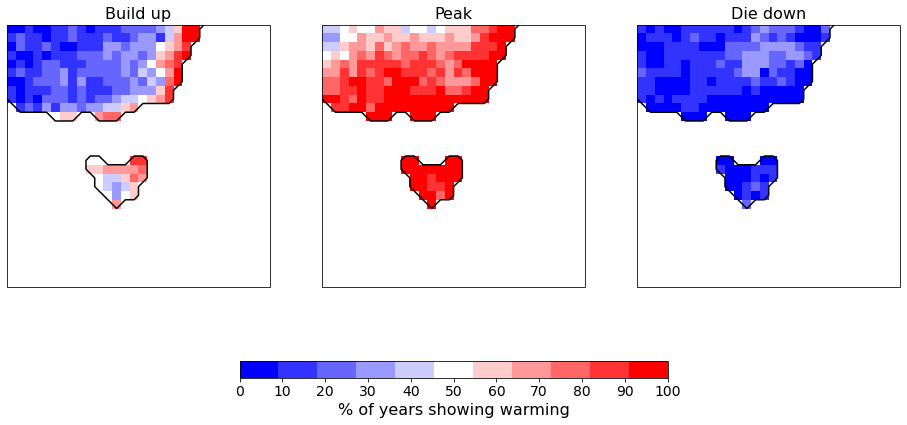

In [16]:
## likelihood of warming plots

def multiple_plots():
    nrow = 1
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = (((year_phases_xr.where(year_phases_xr>0.05).count(dim='time'))/36)*100).where(mask).mean(dim='time')

    phases = ['Build up', 'Peak', 'Die down']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 11),
            vmin=0, vmax=100,
            add_colorbar=False, 
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')

        ax[col].set_extent([140, 155, -48, -33],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(0, 110, 10),fraction=0.035,aspect=25)
    cbar.set_label("% of years showing warming", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/warming_aus.png')
    #0.035

multiple_plots()

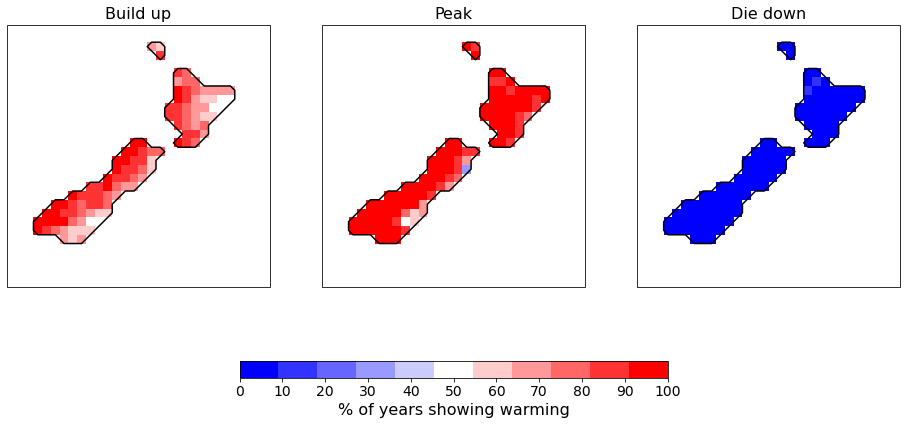

In [17]:
## likelihood of warming plots

def multiple_plots():
    nrow = 1
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = (((year_phases_xr.where(year_phases_xr>0.05).count(dim='time'))/36)*100).where(mask).mean(dim='time')

    phases = ['Build up', 'Peak', 'Die down']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 11),
            vmin=0, vmax=100,
            add_colorbar=False, 
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')

        ax[col].set_extent([165, 180, -49, -34],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(0, 110, 10),fraction=0.035,aspect=25)
    cbar.set_label("% of years showing warming", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/warming_nz.png')
    #0.035

multiple_plots()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


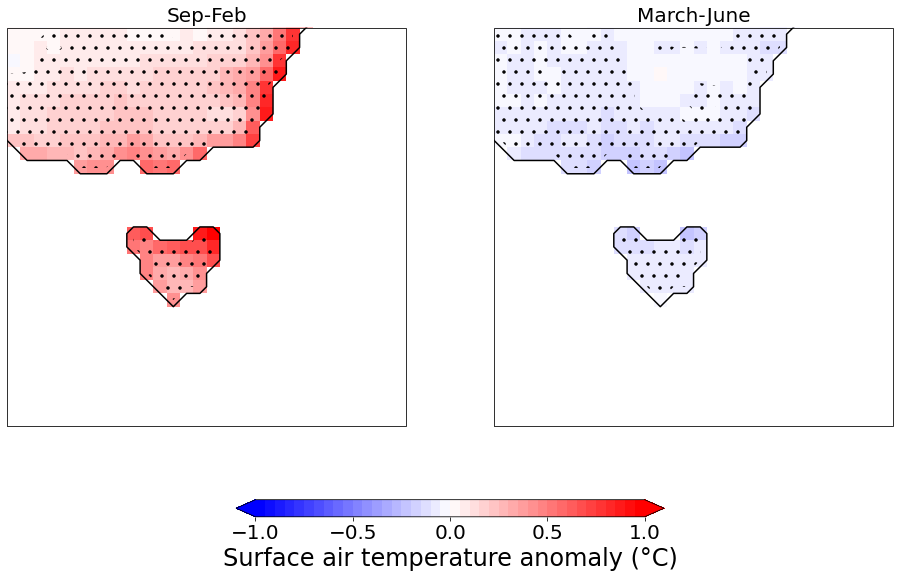

In [8]:
multiple_plots_aus(year_phases_xr, sig_da, exclude_ocean=True)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


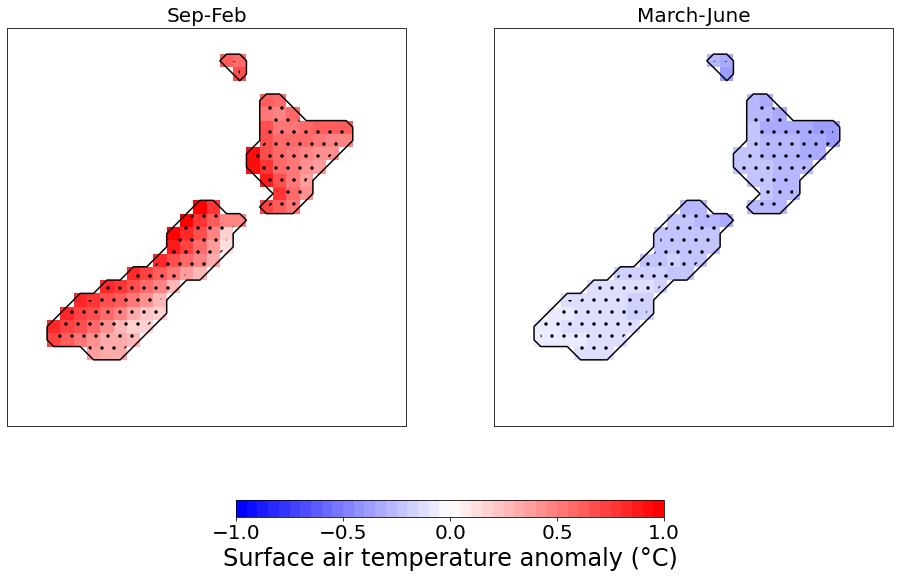

In [13]:
multiple_plots_nz(year_phases_xr, sig_da, exclude_ocean=True)

## Surface upward latent heat flux

In [2]:
TEMP_VAR = "surface_upward_latent_heat_flux"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info

bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

In [4]:
lh_diff_xr = xr.concat([coord_to_dim(year_xr, 'event_month') for year_xr in diff_year_xr_map.values()],
                             dim="year")
lh_diff_xr

,Array,Chunk
Bytes,9.82 MiB,21.48 kiB
Shape,"(36, 13, 50, 110)","(1, 1, 50, 110)"
Count,7545 Tasks,468 Chunks
Type,float32,numpy.ndarray


In [5]:
lh_diff_mon_xr = lh_diff_xr.mean(dim='year')
lh_diff_mon_xr

<xarray.DataArray 'surface_upward_latent_heat_flux' (event_month_dim: 13,
                                                     latitude: 50,
                                                     longitude: 110)>
dask.array<mean_agg-aggregate, shape=(13, 50, 110), dtype=float32, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Dimensions without coordinates: event_month_dim

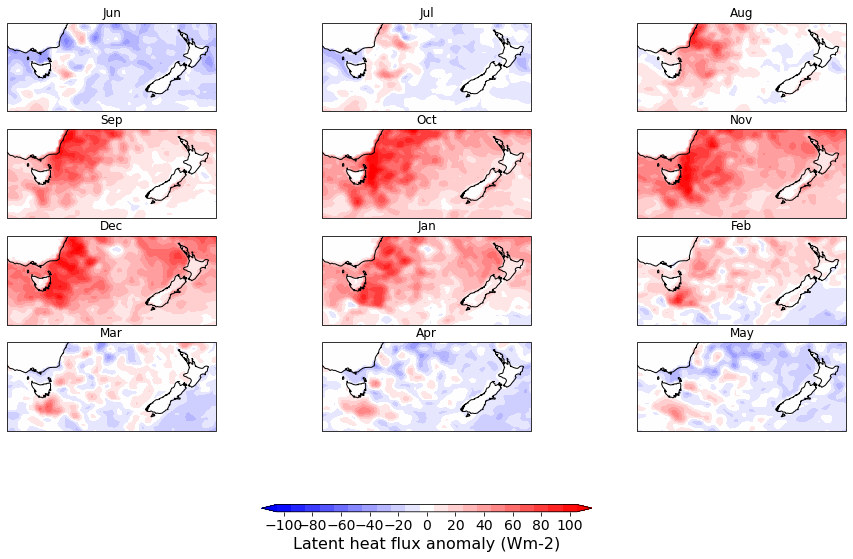

In [17]:
## LHF anomalies

def multiple_plots_lhf_anom():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = lh_diff_mon_xr
    
    month_labels = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    
    data_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(event_month_dim=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-105, 110, 10),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr'),
                extend='both'
            )
            ax[row, col].coastlines()
            #ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_extent([140, 180, -50, -33],crs=ccrs.PlateCarree()) 
            
            ax[row, col].set_title(month_labels[data_idx])

            data_idx += 1
                

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')

    #fig.tight_layout()              
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-100,120,20),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Latent heat flux anomaly (Wm-2)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    fig.patch.set_facecolor('white')
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/lhf_anom_mon.png')
    plt.show()

multiple_plots_lhf_anom()

In [3]:
lh_year_month_xr = get_year_and_months_xr(con_year_xr_map, con_year_xr_map)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [4]:
lh_month_xr = lh_year_month_xr.mean(dim='year')
lh_month_xr

<xarray.DataArray 'surface_upward_latent_heat_flux' (month: 13, latitude: 50,
                                                     longitude: 110)>
dask.array<mean_agg-aggregate, shape=(13, 50, 110), dtype=float32, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Dimensions without coordinates: month

In [5]:
lh_jja = lh_month_xr.sel(month=slice(0,3)).mean(dim='month')
lh_son = lh_month_xr.sel(month=slice(3,6)).mean(dim='month')
lh_djf = lh_month_xr.sel(month=slice(6,9)).mean(dim='month')
lh_mam = lh_month_xr.sel(month=slice(9,12)).mean(dim='month')

In [6]:
lh_seas = xr.concat((lh_jja, lh_son, lh_djf, lh_mam), dim='time')
lh_seas

<xarray.DataArray 'surface_upward_latent_heat_flux' (time: 4, latitude: 50,
                                                     longitude: 110)>
dask.array<concatenate, shape=(4, 50, 110), dtype=float32, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Dimensions without coordinates: time

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **

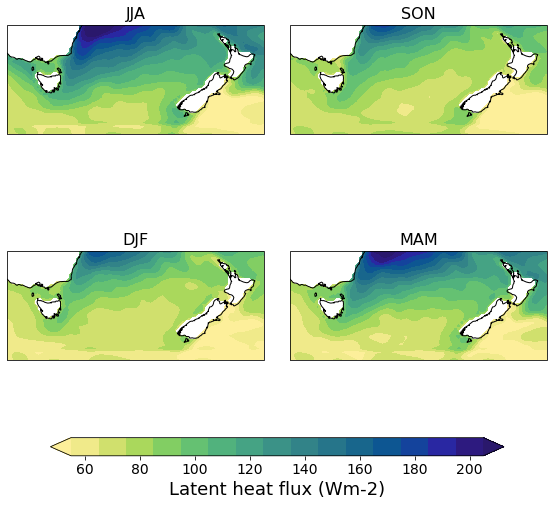

In [24]:
#  Plot seasonal panels winds (ERA5)

def multiple_plots():
    nrow = 2
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(20,12), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data1 = lh_seas
    
    season_labels = ['JJA', 'SON', 'DJF', 'MAM']
    
    data_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data1[data_idx].where(mask==0).mean(dim='time')
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(55, 210, 10),
                add_colorbar=False,
                cmap=cmocean.cm.haline_r,
                extend='both'
           ) 
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -50, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(season_labels[data_idx], fontsize=16)
            
            data_idx += 1        
    
    #fig.tight_layout()
    plt.subplots_adjust(left=0.125,
                    bottom=0.3, 
                    right=0.5, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.15)
    
    cb = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(60,220,20),
                      fraction=0.035,aspect=25, extend='both') #,format='%.2f')
    cb.set_label(label='Latent heat flux (Wm-2)', size=18, weight='normal')
    cb.ax.tick_params(labelsize=14)
 
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/lhf_seas_ocean.png')   

multiple_plots()

In [41]:
# Untested v

lh_year_phases_xr = get_year_2phases_xr(alt_year_xr_map, diff_year_xr_map)

lh_sig_da = get_sig_da(lh_year_phases_xr)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


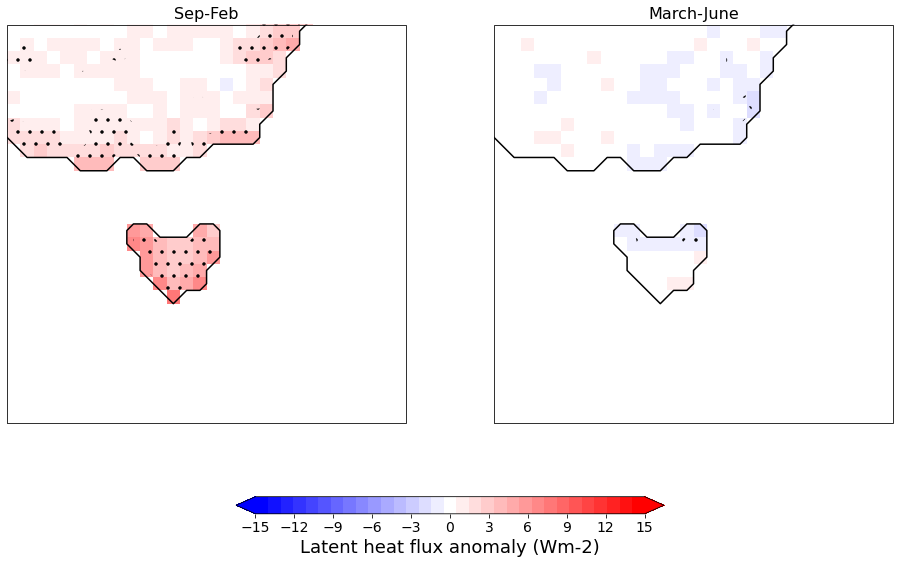

In [42]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = lh_year_phases_xr.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 31),
            vmin=-15, vmax=15,
            add_colorbar=False,
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = lh_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([140, 155, -48, -33],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-15, 16, 3),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Latent heat flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_lh_phases_aus2.png')
    #0.035

multiple_plots()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


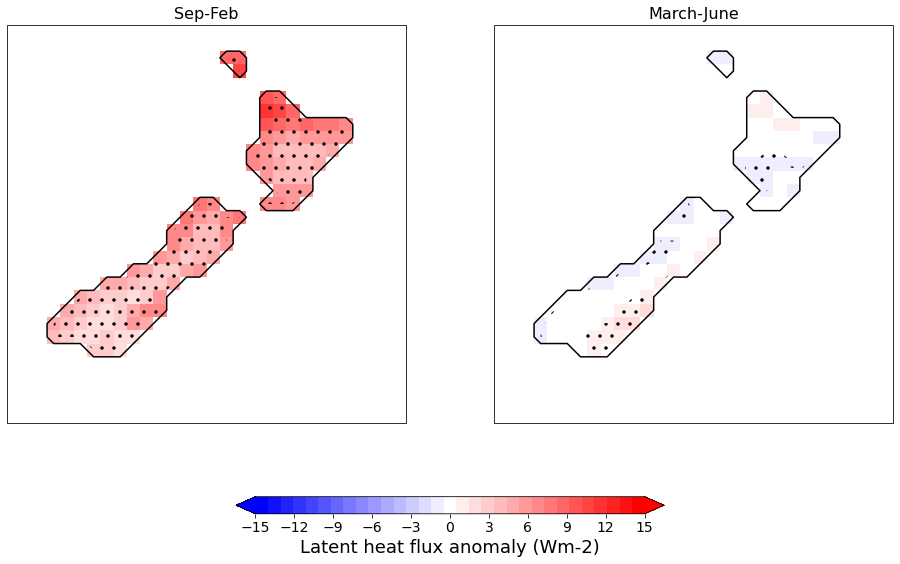

In [43]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = lh_year_phases_xr.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 31),
            vmin=-15, vmax=15,
            add_colorbar=False,
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = lh_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([165, 180, -49, -34],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-15, 16, 3),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Latent heat flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_lh_phases_nz2.png')
    #0.035

multiple_plots()

## Sensible heat flux

In [25]:
TEMP_VAR = "hfss"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

In [19]:
sh_diff_xr = xr.concat([coord_to_dim(year_xr, 'event_month') for year_xr in diff_year_xr_map.values()],
                            dim="year")
sh_diff_xr

,Array,Chunk
Bytes,9.82 MiB,21.48 kiB
Shape,"(36, 13, 50, 110)","(1, 1, 50, 110)"
Count,7545 Tasks,468 Chunks
Type,float32,numpy.ndarray


In [20]:
sh_diff_mon_xr = sh_diff_xr.mean(dim='year')
sh_diff_mon_xr

<xarray.DataArray 'hfss' (event_month_dim: 13, latitude: 50, longitude: 110)>
dask.array<mean_agg-aggregate, shape=(13, 50, 110), dtype=float32, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Dimensions without coordinates: event_month_dim

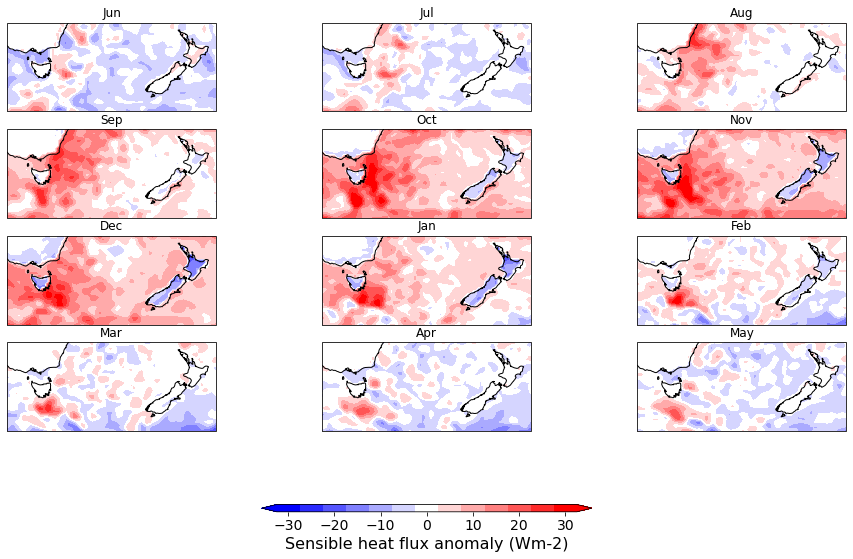

In [26]:
## SHF anomalies

def multiple_plots_shf_anom():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = sh_diff_mon_xr
    
    month_labels = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    
    data_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(event_month_dim=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-32.5, 35, 5),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 13),
                extend='both'
            )
            ax[row, col].coastlines()
            #ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_extent([140, 180, -50, -33],crs=ccrs.PlateCarree()) 
            
            ax[row, col].set_title(month_labels[data_idx])

            data_idx += 1
                

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')

    #fig.tight_layout()              
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-30,40,10),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Sensible heat flux anomaly (Wm-2)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    fig.patch.set_facecolor('white')
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/shf_anom_mon.png')
    plt.show()

multiple_plots_shf_anom()

In [26]:
sh_year_month_xr = get_year_and_months_xr(con_year_xr_map, con_year_xr_map)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [27]:
sh_month_xr = sh_year_month_xr.mean(dim='year')
sh_month_xr

<xarray.DataArray 'hfss' (month: 13, latitude: 50, longitude: 110)>
dask.array<mean_agg-aggregate, shape=(13, 50, 110), dtype=float32, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Dimensions without coordinates: month

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


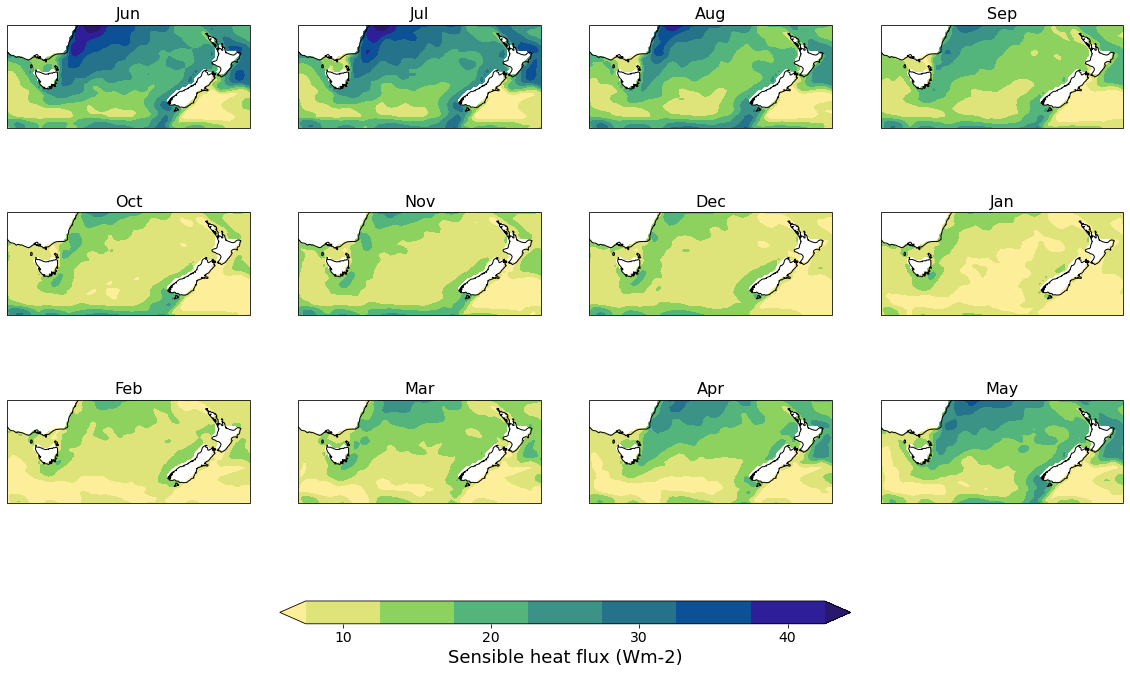

In [52]:
#  Plot monthly panels winds (ERA5)

def multiple_plots():
    nrow = 3
    ncol = 4
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(20,12), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data1 = sh_month_xr.where((mask==0).mean(dim='time'))
    
    month_labels = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    
    data_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data1[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(7.5, 45, 5),
                add_colorbar=False,
                cmap=cmocean.cm.haline_r,
                extend='both'
           ) 
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -50, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(month_labels[data_idx], fontsize=16)
            
            data_idx += 1        
    
    cb = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(10,50,10),
                      fraction=0.035,aspect=25, extend='both') #,format='%.2f')
    cb.set_label(label='Sensible heat flux (Wm-2)', size=18, weight='normal')
    cb.ax.tick_params(labelsize=14)
 
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/shf_mon_ocean.png')   

multiple_plots()

In [28]:
sh_jja = sh_month_xr.sel(month=slice(0,3)).mean(dim='month')
sh_son = sh_month_xr.sel(month=slice(3,6)).mean(dim='month')
sh_djf = sh_month_xr.sel(month=slice(6,9)).mean(dim='month')
sh_mam = sh_month_xr.sel(month=slice(9,12)).mean(dim='month')

In [29]:
sh_seas = xr.concat((sh_jja, sh_son, sh_djf, sh_mam), dim='time')
sh_seas

<xarray.DataArray 'hfss' (time: 4, latitude: 50, longitude: 110)>
dask.array<concatenate, shape=(4, 50, 110), dtype=float32, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Dimensions without coordinates: time

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


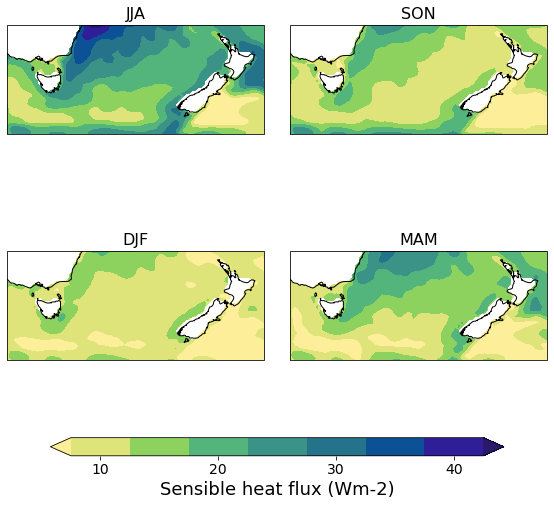

In [35]:
#  Plot seasonal panels winds (ERA5)

def multiple_plots():
    nrow = 2
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(20,12), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data1 = sh_seas.where((mask==0).mean(dim='time'))
    
    season_labels = ['JJA', 'SON', 'DJF', 'MAM']
    
    data_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data1[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(7.5, 45, 5),
                add_colorbar=False,
                cmap=cmocean.cm.haline_r,
                extend='both'
           ) 
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -50, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(season_labels[data_idx], fontsize=16)
            
            data_idx += 1        
    
    #fig.tight_layout()
    plt.subplots_adjust(left=0.125,
                    bottom=0.3, 
                    right=0.5, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.15)
    
    cb = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(10,50,10),
                      fraction=0.035,aspect=25, extend='both') #,format='%.2f')
    cb.set_label(label='Sensible heat flux (Wm-2)', size=18, weight='normal')
    cb.ax.tick_params(labelsize=14)
 
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/shf_seas_ocean.png')   

multiple_plots()

In [45]:
# Untested v

sh_year_phases_xr = get_year_2phases_xr(alt_year_xr_map, diff_year_xr_map)

sh_sig_da = get_sig_da(sh_year_phases_xr)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


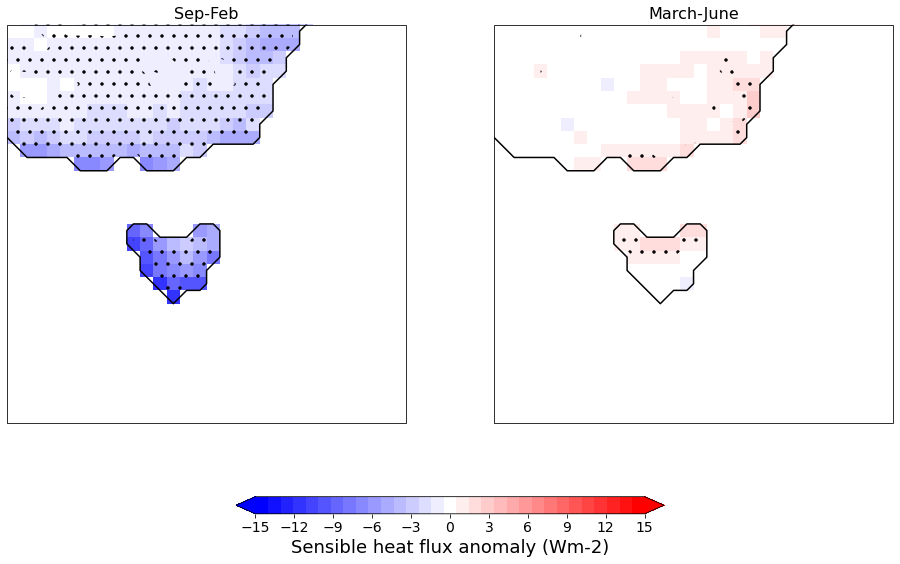

In [46]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = sh_year_phases_xr.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 31),
            vmin=-15, vmax=15,
            add_colorbar=False, 
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = sh_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([140, 155, -48, -33],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-15, 16, 3),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Sensible heat flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_sh_phases_aus2.png')
    #0.035

multiple_plots()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


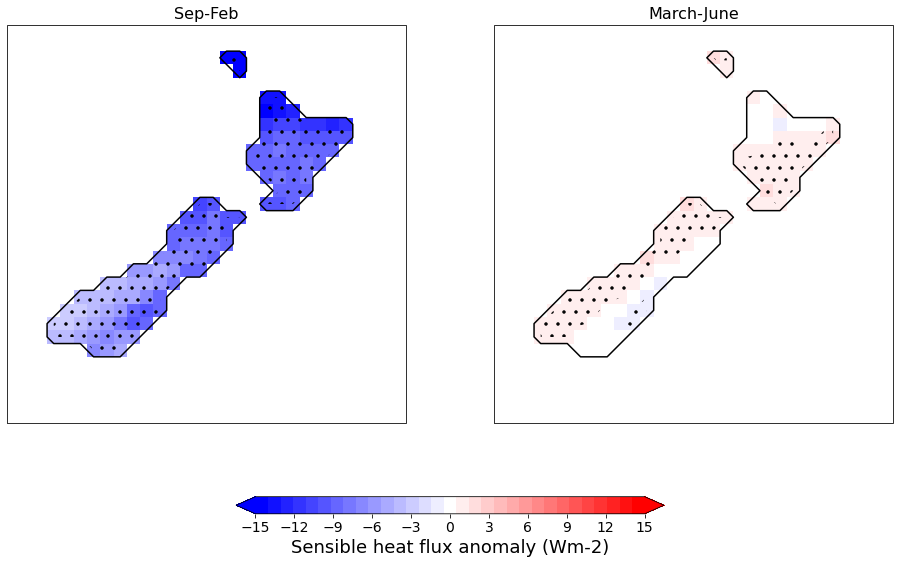

In [47]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = sh_year_phases_xr.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 31),
            vmin=-15, vmax=15,
            add_colorbar=False, 
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = sh_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([165, 180, -49, -34],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-15, 16, 3),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Sensible heat flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_sh_phases_nz2.png')
    #0.035

multiple_plots()

## Shortwave radiation flux

In [36]:
TEMP_VAR = "rss_corr"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [37]:
sw_year_month_xr = get_year_and_months_xr(con_year_xr_map, con_year_xr_map)
sw_month_xr = sw_year_month_xr.mean(dim='year')
sw_jja = sw_month_xr.sel(month=slice(0,3)).mean(dim='month')
sw_son = sw_month_xr.sel(month=slice(3,6)).mean(dim='month')
sw_djf = sw_month_xr.sel(month=slice(6,9)).mean(dim='month')
sw_mam = sw_month_xr.sel(month=slice(9,12)).mean(dim='month')
sw_seas = xr.concat((sw_jja, sw_son, sw_djf, sw_mam), dim='time')

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking coords of 2006 - has 'longtitude'
Checking coords of 2007 - has 'longtitude'
Checking coords of 2008 - has 'longtitude'
Checking coords of 2009 - has 'longtitude'
Checking coords of 2010 - has 'longtitude'
Checking co

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


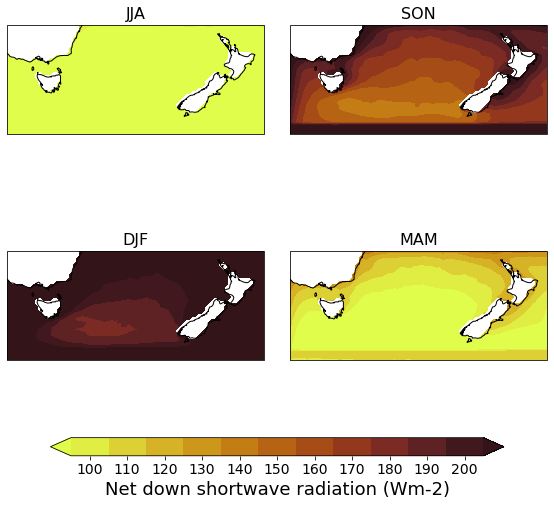

In [42]:
#  Plot seasonal panels 

def multiple_plots():
    nrow = 2
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(20,12), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data1 = sw_seas.where((mask==0).mean(dim='time'))
    
    season_labels = ['JJA', 'SON', 'DJF', 'MAM']
    
    data_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data1[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(95, 210, 10),
                add_colorbar=False,
                cmap=cmocean.cm.solar_r,
                extend='both'
           ) 
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -50, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(season_labels[data_idx], fontsize=16)
            
            data_idx += 1        
    
    #fig.tight_layout()
    plt.subplots_adjust(left=0.125,
                    bottom=0.3, 
                    right=0.5, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.15)
    
    cb = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(100,210,10),
                      fraction=0.035,aspect=25, extend='both') #,format='%.2f')
    cb.set_label(label='Net down shortwave radiation (Wm-2)', size=18, weight='normal')
    cb.ax.tick_params(labelsize=14)
 
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/sw_seas_ocean.png')   

multiple_plots()

In [9]:
# Untested v

sw_year_phases_xr = get_year_2phases_xr(alt_year_xr_map, diff_year_xr_map)

sw_sig_da = get_sig_da(sw_year_phases_xr)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


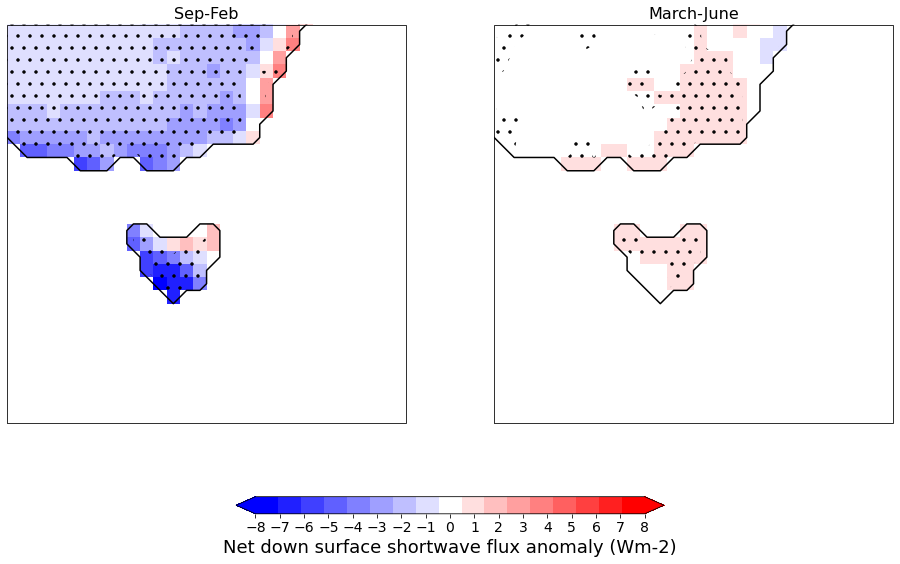

In [10]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = sw_year_phases_xr.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 17),
            vmin=-8, vmax=8,
            add_colorbar=False,
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = sw_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([140, 155, -48, -33],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-8, 9, 1),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Net down surface shortwave flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/new_diff_sw_phases_aus.png')
    #0.035

multiple_plots()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


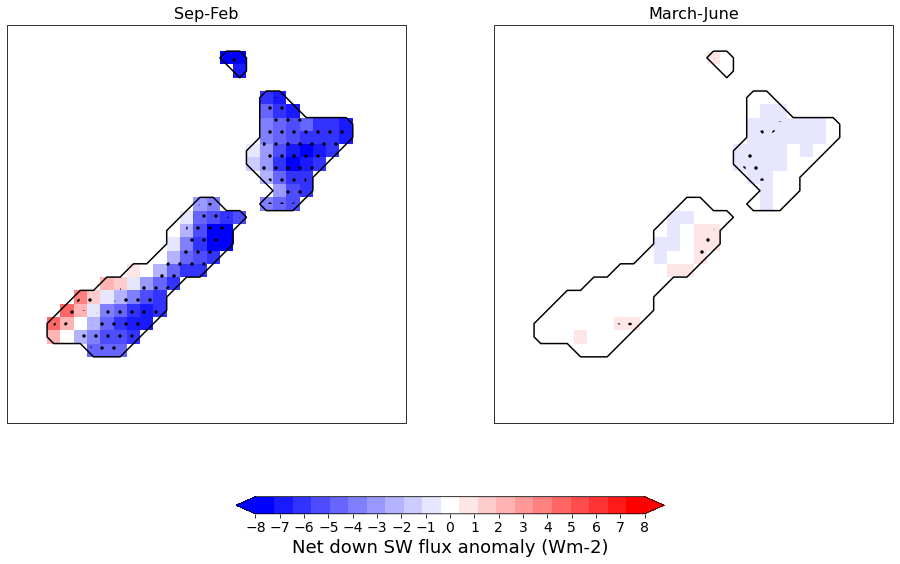

In [17]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = sw_year_phases_xr.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 21),
            vmin=-8, vmax=8,
            add_colorbar=False,
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = sw_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([165, 180, -49, -34],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-8, 9, 1),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Net down SW flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/new_diff_sw_phases_nz.png')
    #0.035

multiple_plots()

## Net SW + Net LW

In [12]:
total = sw_year_phases_xr + lw_year_phases_xr

In [13]:
total_sig = sw_sig_da + lw_sig_da

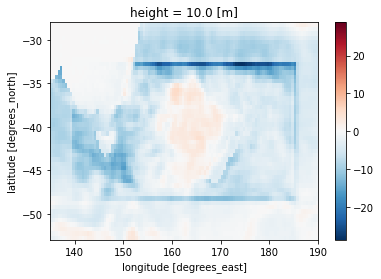

In [14]:
total.isel(phase=0).mean(dim='time').plot()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


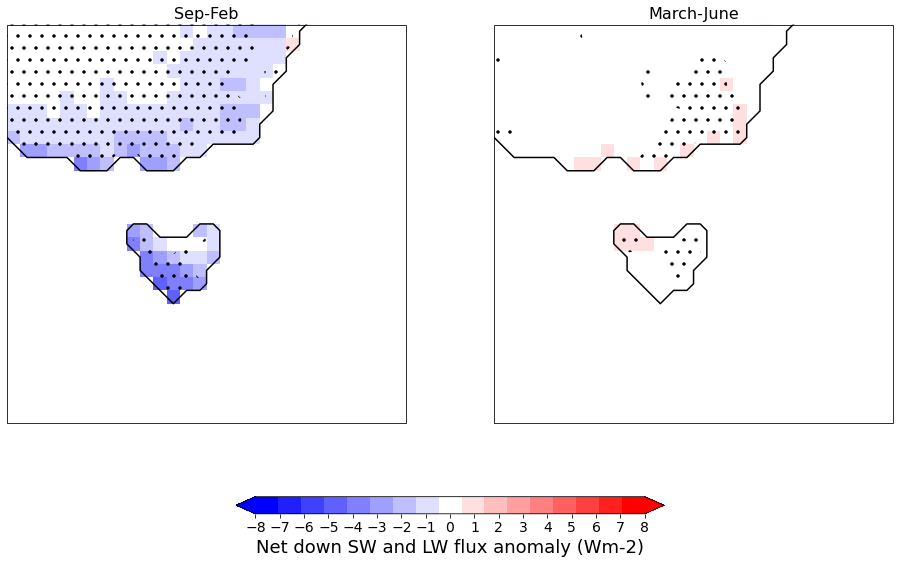

In [15]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = total.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 17),
            vmin=-8, vmax=8,
            add_colorbar=False,
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = total_sig[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([140, 155, -48, -33],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-8, 9, 1),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Net down SW and LW flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/new_diff_sw_lw_phases_aus.png')
    #0.035

multiple_plots()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


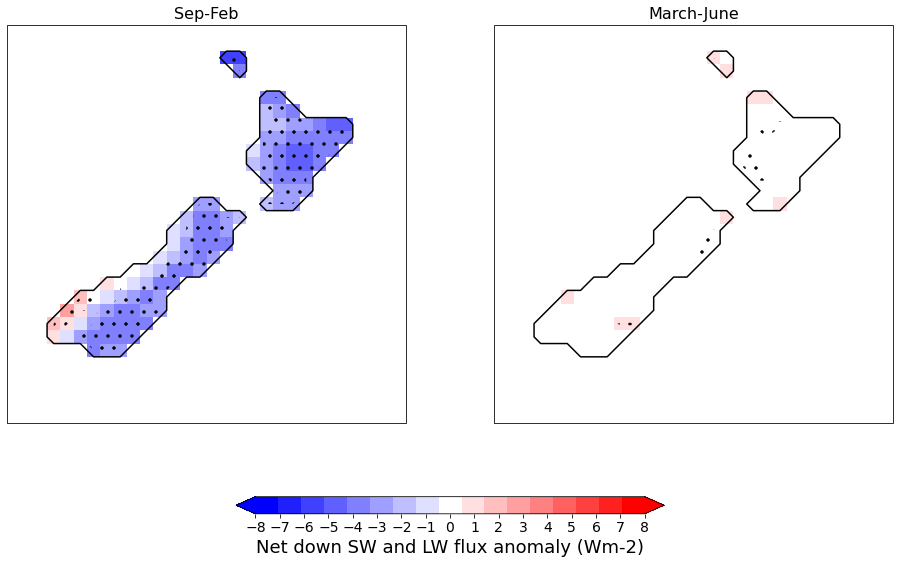

In [16]:
## new diff plot (phases)

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = total.mean(dim='time').where(mask).mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    contour = None
    mask_mean = mask.mean(dim='time')
    
    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 17),
            vmin=-8, vmax=8,
            add_colorbar=False,
        )
        
        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
        
        phase_mask_mean = sw_sig_da[col].where(mask).mean(dim='time')
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )

        ax[col].set_extent([165, 180, -49, -34],crs=ccrs.PlateCarree()) 
        ax[col].set_title(phases[col], fontsize=16)

    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-8, 9, 1),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Net down SW and LW flux anomaly (Wm-2)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/new_diff_sw_lw_phases_nz.png')
    #0.035

multiple_plots()